In [1]:
%matplotlib inline

from pathlib import Path
import sys
sys.path.append("..")

import anamic

import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipyvolume as ipv

/home/hadim/local/conda/envs/ws/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
../anamic/transformations.py:1916: UserWarning: No module named 'anamic._transformations'
  warnings.warn(str(err))


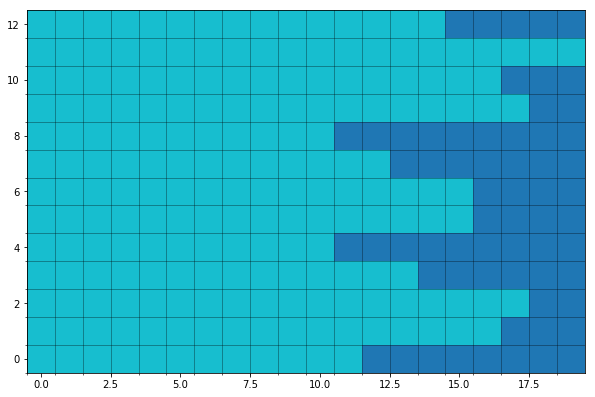

In [2]:
n_pf = 13
n_rows = 20

dimers = np.ones((n_pf, n_rows))
dimers = anamic.structure.generate_random_tapers(dimers, 0, 10)

_ = anamic.viz.viz_dimers(dimers, start_row=0, grid=True)

In [ ]:
positions = anamic.structure.get_dimer_positions(dimers)
anamic.viz.viz_dimer_positions(positions, size=4, color_feature_name='row')

In [5]:
time_per_frame = 1e-1  # s
duration = 1  # s
growth_rate = 1  # um/min
growth_rate_dimer = growth_rate * 1e3 / 8 / 60  # dimer/s
growth_rate_dimer_pf = growth_rate_dimer / n_pf  # dimer/s/pf
dimer_prob = 1 / growth_rate_dimer_pf

positions = pd.DataFrame()

n_step = int(duration / time_per_frame)
proba = time_per_frame / growth_rate_dimer_pf
for t_index in tqdm.trange(0, n_step, 1):
    
    for i_pf in range(n_pf):
        if np.random.randn() < proba:
            
            next_position = np.where(dimers[i_pf] == 0)[0][0]
            if next_position < dimers.shape[1] - 1:
                new_dimers = np.zeros((dimers.shape[0], dimers.shape[1] + 1))
                new_dimers[:,:-1] = dimers
                dimers = new_dimers
            dimers[i_pf, next_position] = 0
            
    current_positions = anamic.structure.get_dimer_positions(dimers)
    current_positions['t_index'] = t_index
    current_positions['t'] = t_index * time_per_frame
    positions = positions.append(current_positions, ignore_index=True)